In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dados de Treino

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Criando uma função para obter os informação do dataframe

In [3]:
def df_informacoes(df):
    df_info = pd.DataFrame({'Não Nulos': df.notnull().sum(),
                'Nulos': df.isnull().sum(),
                '% Nulos': ((df.isnull().sum()/df.notnull().sum())*100).round(2),                         
                'Unicos': df.nunique(),                  
                'Dtype': df.dtypes})
    df_info.index.name = 'Columns'
    return df_info


In [4]:
df_informacoes(train)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
PassengerId,8693,0,0.00,8693,object
HomePlanet,8492,201,2.37,3,object
CryoSleep,8476,217,2.56,2,object
Cabin,8494,199,2.34,6560,object
Destination,8511,182,2.14,3,object
Age,8514,179,2.10,80,float64
VIP,8490,203,2.39,2,object
RoomService,8512,181,2.13,1273,float64
FoodCourt,8510,183,2.15,1507,float64


Substituindo os valores nulos pela media dos valores

columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [5]:
def convert_float_to_int(train, columns):
    for column in columns:
        float_array = np.mean(train[column])
        train[column].fillna(float_array,inplace= True)
    return train

columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
convert_float_to_int(train, columns)
print(train[columns].isna().sum())

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


Trabalhei na variável CryoSleep e Vip -- Criei um dicionário -- Substitui os valores nulos por False = 0

In [6]:
train['CryoSleep'].replace({True: 1, False: 0}, inplace=True)
train['VIP'].replace({True: 1, False: 0}, inplace=True)

#A proporção que aparecia o valor 0 era muito superior

train['CryoSleep'].fillna(False, inplace=True)
train['VIP'].fillna(False, inplace=True)

Tratando a variável HomePlanet

In [7]:
train['HomePlanet'].mode() #valor que mais apareceu

0    Earth
dtype: object

In [8]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0] ,inplace=True) #substituir pelo valor que mais apareceu

In [9]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [10]:
#transformar a variavel HomePlanet
def transformar_HomePlanet(valor):
    if valor == 'Europa':
        return 2
    if valor == 'Mars':
        return 1
    else:
        return 0
    
train['HomePlanet'] = train['HomePlanet'].map(transformar_HomePlanet)


Tratando a variável Destination

In [11]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [12]:
train['Destination'].fillna(train['Destination'].mode()[0] ,inplace=True)

In [13]:
#transformar a variavel Destination
def transformar_Destination(valor):
    if valor == 'TRAPPIST-1e':
        return 2
    if valor == 'PSO J318.5-22':
        return 1
    else:
        return 0
    
train['Destination'] = train['Destination'].map(transformar_Destination)


Criando novas variáveis para o HomePlanet

In [14]:
col_dummies = pd.get_dummies(train['HomePlanet'], prefix='Home', columns=['Europa', 'Earth', 'Mars'])
train = train.join(col_dummies)

#renomear
train.rename(columns={'Home_0':'Home_Earth','Home_1':'Home_Mars','Home_2':'Home_Europa'}, inplace=True)
train.drop('HomePlanet', axis=1,inplace=True) #apagar a coluna

Criando novas variáveis para o Destination

In [15]:
col_dummies = pd.get_dummies(train['Destination'], prefix='Dest', columns=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'])
train = train.join(col_dummies)

#renomear
train.rename(columns={'Dest_0':'Dest_55 Cancri e','Dest_1':'Dest_PSO J318.5-22','Dest_2':'Dest_TRAPPIST-1e'}, inplace=True)
train.drop('Destination', axis=1,inplace=True) #apagar a coluna

Processo para descobrir qual a melhor variável para ajustar a variável Age

In [16]:
cat_features = ['Home_Earth','Home_Mars','Home_Europa','CryoSleep','Dest_55 Cancri e','Dest_PSO J318.5-22','Dest_TRAPPIST-1e','VIP']

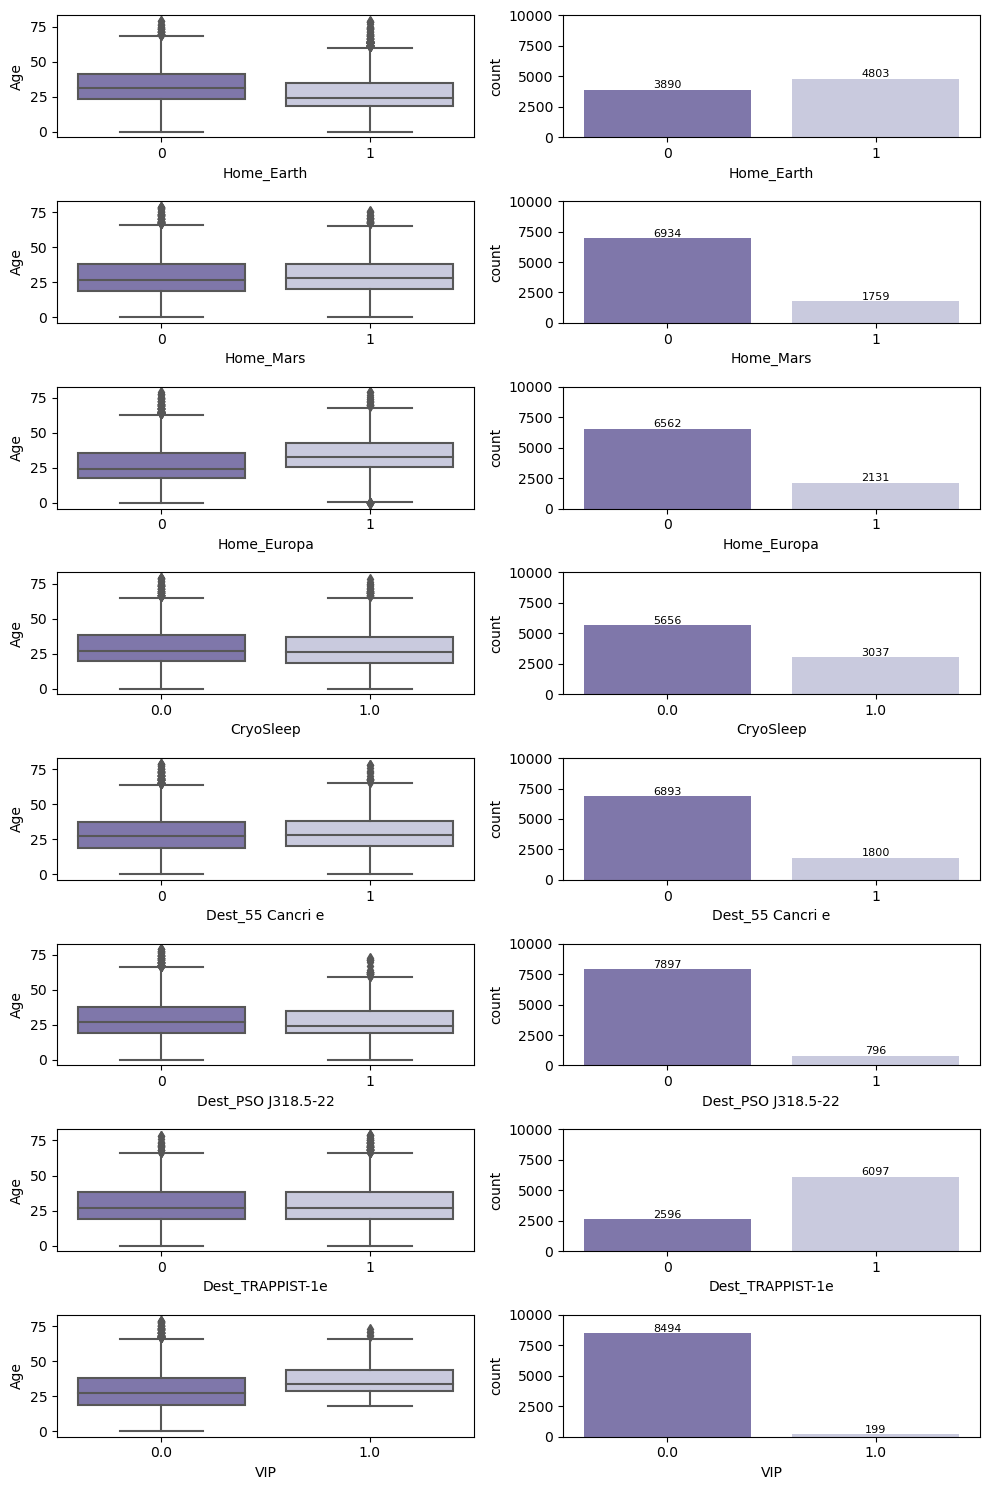

In [17]:
fig, ax = plt.subplots(8, 2, figsize=(10,15), dpi=100)

for idx, each_feature in enumerate(cat_features):
    # Plot Boxplot
    sns.boxplot(y='Age', x=each_feature, data=train, ax=ax[idx,0], palette='Purples_r')
    
    # Plot Countplot
    plot = sns.countplot(x=each_feature, data=train, ax=ax[idx,1], palette='Purples_r')
    ax[idx,1].set_ylim([0, 10000])

    # Colocar valor nas colunas do gráfico
    for i in plot.patches:
      plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=8,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
    
    # Set Axis Labels
    ax[idx,0].xaxis.label.set_size(10)
    ax[idx,0].yaxis.label.set_size(10)
    ax[idx,1].xaxis.label.set_size(10)
    ax[idx,1].yaxis.label.set_size(10)


plt.tight_layout()    
plt.show()

In [18]:
age_corr = train.corr()['Age'].sort_values()
age_corr

Home_Earth           -0.203258
Transported          -0.075026
Dest_PSO J318.5-22   -0.028503
Dest_TRAPPIST-1e      0.003037
Home_Mars             0.016273
Dest_55 Cancri e      0.016873
ShoppingMall          0.032757
RoomService           0.067969
VRDeck                0.099869
Spa                   0.122786
FoodCourt             0.129064
Home_Europa           0.219793
Age                   1.000000
Name: Age, dtype: float64

Usando os dados do 'HomePlanet' para preencher os dados de 'Age' que estão vazios

In [19]:
train.groupby('Home_Europa')['Age'].median()

Home_Europa
0    24.0
1    33.0
Name: Age, dtype: float64

In [20]:
train['Age'] =train.groupby('Home_Europa')['Age'].transform(lambda x : x.fillna(x.median()))
train['Age']

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [21]:
train['Transported'].replace({True: 1, False: 0}, inplace=True)

In [22]:
#transformando object em int64
train['CryoSleep'] = train['CryoSleep'].apply(lambda x: int(x))
train['VIP'] = train['VIP'].apply(lambda x: int(x))


criando novas variaveis

In [23]:
train['total_gasto'] = train['RoomService']+ train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] +train['VRDeck']

In [24]:

n_pessoas = train['PassengerId'].str.split('_')
print(n_pessoas.str.get(0))
print(n_pessoas.str.get(1))

train['n_pessoas_cabine'] = n_pessoas.str.get(1)
train['n_pessoas_cabine'].unique()

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: PassengerId, Length: 8693, dtype: object
0       01
1       01
2       01
3       02
4       01
        ..
8688    01
8689    01
8690    01
8691    01
8692    02
Name: PassengerId, Length: 8693, dtype: object


array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [25]:
def create_dummies_n_pessoas_cabine(df):
    def is_interval_6_to_8(n_pessoas_cabine):
        return int(6 <= int(n_pessoas_cabine) <= 8)
    def is_n_pessoas(n_pessoas_cabine, n_pessoas):
        return int(int(n_pessoas_cabine) == n_pessoas)
    
    df['6 a 8 pessoas'] = df['n_pessoas_cabine'].apply(is_interval_6_to_8)
    df['1 pessoa'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 1))
    df['2 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 2))
    df['3 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 3))
    df['4 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 4))
    df['5 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 5))
    return df

criar_cabine = create_dummies_n_pessoas_cabine(train)

train.drop('n_pessoas_cabine', axis=1,inplace=True) #apagar a coluna

In [26]:

lado_navio = train['Cabin'].str.split('/')
print(lado_navio.str.get(0))
print(lado_navio.str.get(1))
print(lado_navio.str.get(2))

train['lado_navio'] = lado_navio.str.get(2)
train['lado_navio'].unique()

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin, Length: 8693, dtype: object
0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: Cabin, Length: 8693, dtype: object
0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Cabin, Length: 8693, dtype: object


array(['P', 'S', nan], dtype=object)

In [27]:
train['lado_navio'].fillna(train['lado_navio'].mode()[0] ,inplace=True)
train['lado_navio'].unique()


#transformar a variavel lado_navio
def transformar_lado(valor):
    if valor == 'P':
        return 1
    else:
        return 0
    
train['lado_navio'] = train['lado_navio'].map(transformar_lado)
train['lado_navio'] 

0       1
1       0
2       0
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: lado_navio, Length: 8693, dtype: int64

Apagando os dados de PassengerId, Cabin e Name

In [28]:
train.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)

In [29]:
df_informacoes(train)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
CryoSleep,8693,0,0.0,2,int64
Age,8693,0,0.0,80,float64
VIP,8693,0,0.0,2,int64
RoomService,8693,0,0.0,1274,float64
FoodCourt,8693,0,0.0,1508,float64
ShoppingMall,8693,0,0.0,1116,float64
Spa,8693,0,0.0,1328,float64
VRDeck,8693,0,0.0,1307,float64
Transported,8693,0,0.0,2,int64


## Dados de Teste

In [30]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
test1 = test['PassengerId']

In [32]:
def convert_float_to_int(test, columns):
    for column in columns:
        float_array = np.mean(test[column])
        test[column].fillna(float_array,inplace= True)
    return train

columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
convert_float_to_int(test, columns)
print(test[columns].isna().sum())

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [33]:
test['CryoSleep'].replace({True: 1, False: 0}, inplace=True)
test['VIP'].replace({True: 1, False: 0}, inplace=True)

#A proporção que aparecia o valor 0 era muito superior

test['CryoSleep'].fillna(False, inplace=True)
test['VIP'].fillna(False, inplace=True)


In [34]:
#valor que mais apareceu
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0] ,inplace=True)

In [35]:
#transformar a variavel HomePlanet
def transformar_HomePlanet(valor):
    if valor == 'Europa':
        return 2
    if valor == 'Mars':
        return 1
    else:
        return 0
    
test['HomePlanet'] = test['HomePlanet'].map(transformar_HomePlanet)

In [36]:
#valor que mais apareceu
test['Destination'].fillna(test['Destination'].mode()[0] ,inplace=True)

col_dummies = pd.get_dummies(test['HomePlanet'], prefix='Home', columns=['Europa', 'Earth', 'Mars'])
test = test.join(col_dummies)

#renomear
test.rename(columns={'Home_0':'Home_Earth','Home_1':'Home_Mars','Home_2':'Home_Europa'}, inplace=True)
test.drop('HomePlanet', axis=1,inplace=True) #apagar a coluna

In [37]:
col_dummies = pd.get_dummies(test['Destination'], prefix='Dest', columns=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'])
test = test.join(col_dummies)

#renomear
test.rename(columns={'Dest_0':'Dest_55 Cancri e','Dest_1':'Dest_PSO J318.5-22','Dest_2':'Dest_TRAPPIST-1e'}, inplace=True)
test.drop('Destination', axis=1,inplace=True) #apagar a coluna

In [38]:
test['Age'] = test.groupby('Home_Europa')['Age'].transform(lambda x : x.fillna(x.median()))
test['Age']


0       27.0
1       19.0
2       31.0
3       38.0
4       20.0
        ... 
4272    34.0
4273    42.0
4274    24.0
4275    32.0
4276    43.0
Name: Age, Length: 4277, dtype: float64

In [39]:
test['CryoSleep'] = test['CryoSleep'].apply(lambda x: int(x))
test['VIP'] = test['VIP'].apply(lambda x: int(x))


In [40]:
test['total_gasto'] = test['RoomService']+ test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

In [41]:
n_pessoas = test['PassengerId'].str.split('_')
print(n_pessoas.str.get(0))
print(n_pessoas.str.get(1))

test['n_pessoas_cabine'] = n_pessoas.str.get(1)
test['n_pessoas_cabine'].unique()


0       0013
1       0018
2       0019
3       0021
4       0023
        ... 
4272    9266
4273    9269
4274    9271
4275    9273
4276    9277
Name: PassengerId, Length: 4277, dtype: object
0       01
1       01
2       01
3       01
4       01
        ..
4272    02
4273    01
4274    01
4275    01
4276    01
Name: PassengerId, Length: 4277, dtype: object


array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [42]:
def create_dummies_n_pessoas_cabine(df):
    def is_interval_6_to_8(n_pessoas_cabine):
        return int(6 <= int(n_pessoas_cabine) <= 8)
    def is_n_pessoas(n_pessoas_cabine, n_pessoas):
        return int(int(n_pessoas_cabine) == n_pessoas)
    
    df['6 a 8 pessoas'] = df['n_pessoas_cabine'].apply(is_interval_6_to_8)
    df['1 pessoa'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 1))
    df['2 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 2))
    df['3 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 3))
    df['4 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 4))
    df['5 pessoas'] = df['n_pessoas_cabine'].apply(lambda x: is_n_pessoas(x, 5))
    return df

criar_cabine = create_dummies_n_pessoas_cabine(test)

test.drop('n_pessoas_cabine', axis=1,inplace=True) #apagar a coluna

In [43]:
lado_navio = test['Cabin'].str.split('/')
print(lado_navio.str.get(0))
print(lado_navio.str.get(1))
print(lado_navio.str.get(2))

test['lado_navio'] = lado_navio.str.get(2)
test['lado_navio'].unique()

0         G
1         F
2         C
3         C
4         F
       ... 
4272      G
4273    NaN
4274      D
4275      D
4276      G
Name: Cabin, Length: 4277, dtype: object
0          3
1          4
2          0
3          1
4          5
        ... 
4272    1496
4273     NaN
4274     296
4275     297
4276    1498
Name: Cabin, Length: 4277, dtype: object
0         S
1         S
2         S
3         S
4         S
       ... 
4272      S
4273    NaN
4274      P
4275      P
4276      S
Name: Cabin, Length: 4277, dtype: object


array(['S', 'P', nan], dtype=object)

In [44]:
test['lado_navio'].fillna(test['lado_navio'].mode()[0] ,inplace=True)
test['lado_navio'].unique()


#transformar a variavel lado_navio
def transformar_lado(valor):
    if valor == 'P':
        return 1
    else:
        return 0
    
test['lado_navio'] = test['lado_navio'].map(transformar_lado)
test['lado_navio'] 

0       0
1       0
2       0
3       0
4       0
       ..
4272    0
4273    0
4274    1
4275    1
4276    0
Name: lado_navio, Length: 4277, dtype: int64

In [45]:
test.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)

In [46]:
df_informacoes(test)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
CryoSleep,4277,0,0.0,2,int64
Age,4277,0,0.0,79,float64
VIP,4277,0,0.0,2,int64
RoomService,4277,0,0.0,843,float64
FoodCourt,4277,0,0.0,903,float64
ShoppingMall,4277,0,0.0,716,float64
Spa,4277,0,0.0,834,float64
VRDeck,4277,0,0.0,797,float64
Home_Earth,4277,0,0.0,2,uint8


## ML

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.metrics import accuracy_score

from skopt import dummy_minimize
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from skopt import gp_minimize

In [48]:
train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Home_Earth', 'Home_Mars',
       'Home_Europa', 'Dest_55 Cancri e', 'Dest_PSO J318.5-22',
       'Dest_TRAPPIST-1e', 'total_gasto', '6 a 8 pessoas', '1 pessoa',
       '2 pessoas', '3 pessoas', '4 pessoas', '5 pessoas', 'lado_navio'],
      dtype='object')

In [49]:
test.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Home_Earth', 'Home_Mars', 'Home_Europa',
       'Dest_55 Cancri e', 'Dest_PSO J318.5-22', 'Dest_TRAPPIST-1e',
       'total_gasto', '6 a 8 pessoas', '1 pessoa', '2 pessoas', '3 pessoas',
       '4 pessoas', '5 pessoas', 'lado_navio'],
      dtype='object')

In [50]:
variaveis = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Home_Earth', 'Home_Mars',
       'Home_Europa', 'Dest_55 Cancri e', 'Dest_PSO J318.5-22',
       'Dest_TRAPPIST-1e', 'total_gasto', '6 a 8 pessoas', '1 pessoa',
       '2 pessoas', '3 pessoas', '4 pessoas', '5 pessoas', 'lado_navio']
X = train[variaveis]
y = train['Transported']

SEED = 301
np.random.seed(SEED)

In [53]:
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, test_size=0.3, random_state=SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 6085 elementos e testaremos com 2608 elementos


In [54]:
mdl = LGBMClassifier(random_state=SEED)
mdl.fit(treino_x,treino_y)

LGBMClassifier(random_state=301)

In [55]:
p = mdl.predict(teste_x)

In [56]:
roc_auc_score(teste_y,p)

0.7965180458101104

In [57]:
def treinar_modelo(params):
    learning_rate = params[0]
    num_levaes = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]

    print(params, '\n')


    mdl = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_levaes, min_child_samples=min_child_samples, 
                         subsample=subsample, colsample_bytree=colsample_bytree, random_state=SEED, subsample_freq=1,
                         n_estimators=100)
    mdl.fit(treino_x,treino_y)

    p = mdl.predict_proba(teste_x)[:,1]

    return -roc_auc_score(teste_y, p)

space = [(1e-3, 1e-1), #learning_rate
         (2,128), #num_leaves
         (1,100), #min_child_samples
         (0.05,1.0), #subsample
         (0.1,1.0)] #colsample_bytree

resultado = dummy_minimize(treinar_modelo, space, random_state=SEED, verbose=1, n_calls=30)


Iteration No: 1 started. Evaluating function at random point.
[0.012244332259626466, 70, 19, 0.8593006190211081, 0.36425300051189846] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1760
Function value obtained: -0.8775
Current minimum: -0.8775
Iteration No: 2 started. Evaluating function at random point.
[0.09833408507457006, 94, 57, 0.9336407075733751, 0.7765963753291103] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2100
Function value obtained: -0.8848
Current minimum: -0.8848
Iteration No: 3 started. Evaluating function at random point.
[0.07187712495609859, 96, 53, 0.515437284725449, 0.9921000630321029] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1320
Function value obtained: -0.8856
Current minimum: -0.8856
Iteration No: 4 started. Evaluating function at random point.
[0.0019779758071469815, 43, 41, 0.16003385221219057, 0.774626944959484] 

Iteration No: 4 ended. Evaluation done at random point.
Time t

In [58]:
resultado.x

[0.04536156502499449, 21, 73, 0.5479171578924936, 0.91249864264177]

In [59]:
score = accuracy_score(teste_y, p)
score

0.7967791411042945

BAYESIAN OPTIMIZATION

In [61]:
resultados_gp = gp_minimize(treinar_modelo, space, random_state=SEED, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.012244332259626466, 32, 85, 0.32893372276255944, 0.9848553188597278] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1340
Function value obtained: -0.8796
Current minimum: -0.8796
Iteration No: 2 started. Evaluating function at random point.
[0.05266149594356653, 51, 47, 0.7569144597659561, 0.5616331922867488] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2000
Function value obtained: -0.8909
Current minimum: -0.8909
Iteration No: 3 started. Evaluating function at random point.
[0.09007724075963722, 64, 99, 0.05938461633120841, 0.49317885858260035] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0450
Function value obtained: -0.8326
Current minimum: -0.8909
Iteration No: 4 started. Evaluating function at random point.
[0.012466685651586179, 96, 48, 0.9261924845836879, 0.4316408143585838] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [62]:
resultados_gp.x

[0.05925283957644784, 32, 1, 0.8954775287355338, 0.43271714079280876]

In [63]:
# Cria o classificador
modelofinal = LGBMClassifier(learning_rate=0.05925283957644784, num_leaves=32, min_child_samples=1, 
                         subsample=0.8954775287355338, colsample_bytree=0.43271714079280876, random_state=SEED, subsample_freq=1,
                         n_estimators=100)
                         
modelofinal.fit(treino_x, treino_y)
score = modelofinal.score(teste_x, teste_y)
y_pred = modelofinal.predict(test) #pra aplicar o modelo no dataframe de teste  
len(y_pred)


4277

In [ ]:
#não apresentou um resultado melhor
#cross = cross_val_score(modelofinal, X, y)
#print('O modelo de Random forest teve a acurácia de:', np.mean(cross))

In [64]:
def transf_predict(valor):
    if valor == 1:
        return True
    elif valor == 0:
        return False

In [65]:
test['Transported'] = y_pred
test['Transported'] = test['Transported'].map(transf_predict)

pred = test['Transported'].values

'''Com isso iremos fazer o predict no conjunto de teste e criar uma nova coluna chamada Transported, 
    essa coluna irá receber a função para transformar o 1 e 0 em True e False.'''


'Com isso iremos fazer o predict no conjunto de teste e criar uma nova coluna chamada Transported, \n    essa coluna irá receber a função para transformar o 1 e 0 em True e False.'

In [66]:
''' Salvando o arquivo em .csv para fazer o submission no link da competição.'''
sub = pd.Series(pred, index=test1, name='Transported')
sub.to_csv('submission.csv', header=True)